### Logistic Regression

$\hat y = \frac{1}{1+e^{-(wX+b)}}$  

$Pr(y_i=1) = f(x) = \frac{1}{1+e^{-(wX+b)}} = \hat y$  
$Pr(y_i=0) = 1-f(x) = 1 - \hat y$

用maximum likelihood  
$\displaystyle\prod_{i=1}^m (\hat y_i )^y_i(1-\hat y_i)^{(1-y_i)}$  
乘上-1/m轉成求loss極小值  
$J(w,b) = \displaystyle -\frac{1}{m}\prod_{i=1}^m (\hat y_i )^y_i(1-\hat y_i)^{(1-y_i)}$  


取log  
$J(w,b)  = \displaystyle-\frac{1}{m}\sum_{i=1}^m y_i*log(\hat y_i )+(1-y_i)*log(1-\hat y_i)$  
求$\frac{\partial J}{\partial w_j}$:  
> $g'(x) = \frac{1}{1+e^{-x}}$對x微分= 對$(1+e^{-x})^{-1}$微分=$(-1)*(1+e^{-x})^{-2}*e^{-x}*(-1) = \frac{1}{1+e^{-x}}\frac{e^{-x}}{1+e^{-x}}=g(x)(1-g(x))$  
> 所以$\hat y' = \hat y * (1-\hat y)$  
> 對於$y_i*log(\hat y_i )$  
> 因為$\hat y_i = \frac{1}{1+e^{-(wX_i+b)}}$,  
所以$\frac{\partial y_i log(\hat y_i)}{\partial w_j}$
$= \frac{\partial y_i log(\frac{1}{1+e^{-(wX_i+b)}})}{\partial \frac{1}{1+e^{-(wX_i+b)}}}*\frac{\partial \frac{1}{1+e^{-(wX_i+b)}}}{\partial (wX_i+b)} *\frac{\partial (wX_i+b)}{\partial w_j} = -y_i*(1-\hat y)*x_{ij} = -x_{ij}(y_i-y_i\hat{y_i})$  
所以$\frac{\partial (1-y_i) log(1-\hat{y_i})}{\partial w_j} = (1-y_i)\frac{\partial log(1-\hat{y_i})}{\partial (1-\hat {y_i})}\frac{\partial (1-\hat{y_i})}{\partial x_i} \frac{\partial x_i}{\partial w_j} = -(y_i - 1)*\hat{y_i}*x_{ij}= -x_{ij}(y_i\hat{y_i}-\hat {y_i})$  
乘上前面的負號可得$\frac{\partial J}{\partial w_j} = \displaystyle\sum_{i=1}^m x_{ij}(\hat {y_i} - {y_i})$  
所以$\triangledown_{w_j} J = \displaystyle\sum_{i=1}^m x_j^{(i)}(\hat y^{(i)} - { y^{(i)}}) $上標i表示第i個sample  

求$\frac{\partial J}{\partial b}$:  
> $x_{ij}\to 1$ 得到 $\triangledown_b J = \displaystyle\sum_{i=1}^m (\hat y^{(i)} - { y^{(i)}})$

Update:  
$w^{(k+1)} = w^{(k)} - \eta \triangledown_w J$  
$b^{(k+1)} = b^{(k)} - \eta \triangledown_b J$

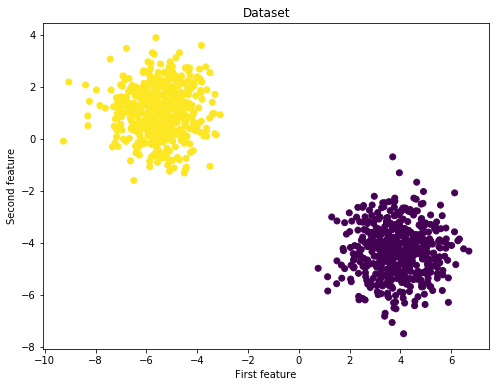

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(123)

%matplotlib inline

# We will perform logistic regression using a simple toy dataset of two classes
X, y = make_blobs(n_samples= 1000, centers=2)
#1000筆有500筆y=0,500筆y=1
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()
y = y[:, np.newaxis]
X_train, X_test, y_train, y_test = train_test_split(X, y)

Cost after iteration 0: 0.6931471805599453
Cost after iteration 100: 0.004634980637890217
Cost after iteration 200: 0.0024425057206982643
Cost after iteration 300: 0.0016775414598021161
Cost after iteration 400: 0.0012846931689921663
Cost after iteration 500: 0.001044427062056802


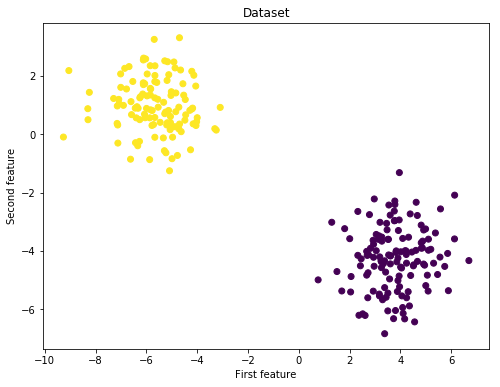

In [52]:
def sigmoid(x):
    return 1 / (1+np.exp(-1*x))

def loss_function(y,y_hat):
    return -1./float(len(y))*np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

def train(X,y,n_iters=600,learn_rate=0.1):
    w = np.zeros((len(X[0]),1),dtype=float)
    b = 0
    loss = []
    for i in range(n_iters):
        y_hat = sigmoid(np.dot(X,w)+ b)
        loss.append(loss_function(y,y_hat))
        dw0 = 1./float(len(X)) *np.sum([X[i,0]*(y_hat[i]-y[i]) for i in range(len(X))])
        dw1 = 1./float(len(X)) *np.sum([X[i,1]*(y_hat[i]-y[i]) for i in range(len(X))])
        dw = np.array([dw0,dw1])
        dw = dw[:,np.newaxis]
        db =  1./float(len(X))*np.sum([y_hat[i]-(y[i]) for i in range(len(X))])
        w = w - learn_rate * dw
        b = b - learn_rate * db
        if i % 100 == 0:
            print(f"Cost after iteration {i}: {loss_function(y,y_hat)}")
    return w,b

def predict(X,w,b,threshold=0.5):
    y_hat = sigmoid(np.dot(X,w)+ b)
    y_class = []
    for val in y_hat:
        if (val > threshold):
            y_class.append(1)
        else:
            y_class.append(0)
    return y_class
    
    
w_predict,b_predict = train(X_train,y_train)

predicted = predict(X_test,w_predict,b_predict) 
fig = plt.figure(figsize=(8,6))
plt.scatter(X_test[:,0], X_test[:,1], c=predicted)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

